In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load cleaned and feature-engineered dataset
df = pd.read_csv('sp500_cleaned_features.csv', parse_dates=['date'])

In [5]:
# Drop rows with missing data in features/target (if any)
df = df.dropna(subset=[
    'close', 'close_sq', 'close_vol_interaction', 'close_rolling_mean_5', 'target'
])

In [6]:
# Define features for modeling
feature_cols = ['close', 'close_sq', 'close_vol_interaction', 'close_rolling_mean_5']
X = df[feature_cols]

# Define binary target (1 if next day price rises, 0 otherwise)
y = df['target']

In [7]:
# Add intercept term
X = sm.add_constant(X)

In [8]:
# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit(disp=False)  # Suppress fitting output

In [9]:
# Show summary of model fit: coefficients, std errors, p-values, confidence intervals
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               619040
Model:                          Logit   Df Residuals:                   619035
Method:                           MLE   Df Model:                            4
Date:                Tue, 05 Aug 2025   Pseudo R-squ.:               0.0001886
Time:                        08:47:11   Log-Likelihood:            -4.2850e+05
converged:                       True   LL-Null:                   -4.2858e+05
Covariance Type:            nonrobust   LLR p-value:                 6.313e-34
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0851      0.004     19.242      0.000       0.076       0.094
close                    -0.0153      0.001    -12.210      0.000      -0.018      -0.013
close_sq               3.755e-08   4.63e-08      0.810      0.418   -5.33e-08    1.28e-07
close_vol_interaction -1.648e-11    6.1e-12     -2.702      0.007   -2.84e-11   -4.53e-12
close_rolling_mean_5      0.0153      0.001     12.208      0.000       0.013       0.018
=========================================================================================
"""

In [10]:
# Joint hypothesis test that polynomial and interaction coefficients are zero
hypothesis = 'close_sq = 0, close_vol_interaction = 0'
wald_test = result.wald_test(hypothesis)
print("\nWald test for polynomial and interaction terms significance:")
print(wald_test)


Wald test for polynomial and interaction terms significance:
<Wald test (chi2): statistic=[[8.03734599]], p-value=0.017976804395455414, df_denom=2>


C:\Users\shara\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [11]:
# Calculate odds ratios and 95% confidence intervals for each coefficient
params = result.params
conf_int = result.conf_int()
odds_ratios = np.exp(params)
conf_exp = np.exp(conf_int)

or_summary = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    '2.5% CI': conf_exp[0],
    '97.5% CI': conf_exp[1]
})

print("\nOdds Ratios with 95% Confidence Intervals:")
print(or_summary)


Odds Ratios with 95% Confidence Intervals:
                       Odds Ratio   2.5% CI  97.5% CI
const                    1.088833  1.079435  1.098313
close                    0.984855  0.982446  0.987271
close_sq                 1.000000  1.000000  1.000000
close_vol_interaction    1.000000  1.000000  1.000000
close_rolling_mean_5     1.015382  1.012897  1.017873


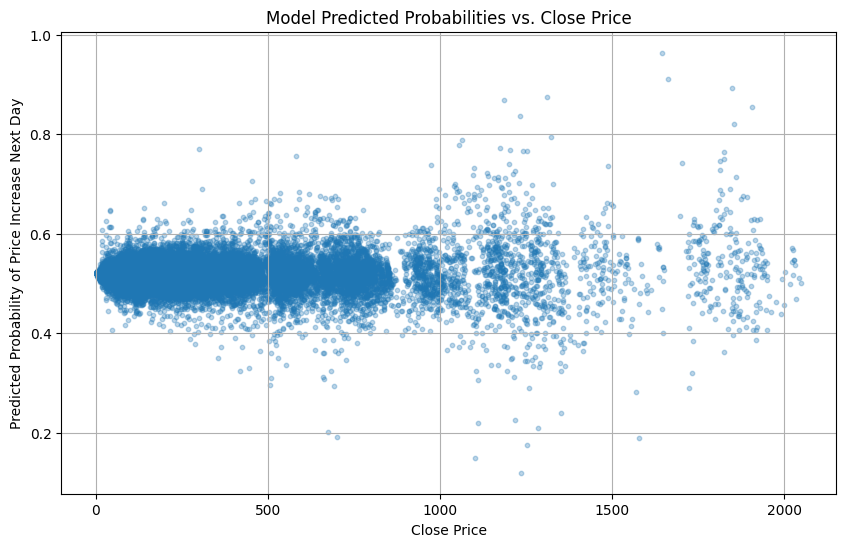

In [12]:
# Add predicted probabilities to the dataframe
df['predicted_prob'] = result.predict(X)

# Visualization: Predicted probability of price increase vs Close price
plt.figure(figsize=(10, 6))
plt.scatter(df['close'], df['predicted_prob'], alpha=0.3, s=10)
plt.xlabel('Close Price')
plt.ylabel('Predicted Probability of Price Increase Next Day')
plt.title('Model Predicted Probabilities vs. Close Price')
plt.grid(True)
plt.show()